# Data Exploration

# importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#(warnings.filterwarnings("ignore") by this you can prevent/ignore warnings from affecting your program’s flow.)

# Loading the dataset

Here we are reading the data from the dataset and storing it in a dataframe (df)
df.head & df.tail gives us the first and last 5 rows by default

In [7]:
#reading the data
df=pd.read_csv("C:/Users/ACER/OneDrive/Desktop/Innobyte Data Analyst Internship/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# Adding a random "Date" column to existing dataset for further Analysis 

In [348]:
# Generating random dates
start_date = '2024-01-01'
end_date = '2024-12-31'
num_rows = len(df)
random_dates = np.random.choice(pd.date_range(start=start_date, end=end_date), num_rows)

# Add the random dates as a new column
df['Date'] = random_dates

# Display the updated DataFrame
print(df)

           Ship_Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal_Code Region         Category Sub-Categ

# Total number of records
Here no of rows are 9994 & no of columns are 13

In [349]:
print(df.shape) 

(9994, 14)


# Genrate New .csv file with all changes

In [549]:
df.to_csv('New_Superstore.csv', index = False)

In [350]:
#It will show if there are unique columns
#The columns represent the different features in our dataset.
print(df.columns.is_unique)

True


# Columns Names
We do this to see all columns names so that we can decide which columns are required/importent for aur model 
(Like here our dependent model or we can say outcome column is Profit which will be on Y-axis)

In [351]:
#Using list() function to get the all Column Names
column_headers = list(df)
print(column_headers)

['Ship_Mode', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Date']


In [352]:
 # Rename a single column permanently
df.rename(columns={'Ship Mode': 'Ship_Mode','Postal Code':'Postal_Code'}, inplace=True)


# Check Datatypes
We need to check datatypes because many time there are wrong values in the column and that affects the datatype of columns and also the outcome of our model(for example hee pastal code can not have decimal values if it has it will give its datatype as float64 so for that we need to find first how many values are in decimal there and remove them and then change the datatype to int64 using astype() )

In [353]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship_Mode     9994 non-null   object        
 1   Segment       9994 non-null   object        
 2   Country       9994 non-null   object        
 3   City          9994 non-null   object        
 4   State         9994 non-null   object        
 5   Postal_Code   9994 non-null   int64         
 6   Region        9994 non-null   object        
 7   Category      9994 non-null   object        
 8   Sub-Category  9994 non-null   object        
 9   Sales         9994 non-null   float64       
 10  Quantity      9994 non-null   int64         
 11  Discount      9994 non-null   float64       
 12  Profit        9994 non-null   float64       
 13  Date          9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None


# Find Duplicated & non-duplicated rows

->(df.duplicated() == False) selects rows that are unique (not duplicated).                                                      
->the rows are unique and do not have any duplicates                                                                             
->Count of unique rows = 9977                                                    
->from here onwards we will be using dataframe df1 as it contains all unique row values

# Unique Data

In [354]:
df1=(df[df.duplicated() == False])
print(df1)

           Ship_Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal_Code Region         Category Sub-Categ

In [355]:
print(df1.shape)

(9994, 14)


# Duplicated Data

#The .duplicated() method identifies rows with the same content in rest of the rows in dataframe.                              
#(df[df.duplicated() == True]) select the row which are duplicated or we can #say same as other rows in dataframe               
Count of Duplicated rows = 17

In [356]:
df2=(df[df.duplicated() == True])
print(df2)

Empty DataFrame
Columns: [Ship_Mode, Segment, Country, City, State, Postal_Code, Region, Category, Sub-Category, Sales, Quantity, Discount, Profit, Date]
Index: []


In [357]:
print(df2.shape)

(0, 14)


# Find Distinct Values In Columns

In [358]:
Unique_Category = df1['Category'].unique()
print("Unique values of column Category")
print(Unique_Category )


Unique values of column Category
['Furniture' 'Office Supplies' 'Technology']


In [359]:
print("Unique values of column Sub-Category")
df1['Sub-Category'].unique()

Unique values of column Sub-Category


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [360]:
print("Unique values of column Region ")
df1['Region'].unique()

Unique values of column Region 


array(['South', 'West', 'Central', 'East'], dtype=object)

In [361]:
print("Unique values of column Ship Mode ")
df1['Ship_Mode'].unique()

Unique values of column Ship Mode 


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [362]:
print("Unique values of column Segment ")
df1['Segment'].unique()

Unique values of column Segment 


array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [365]:
df1[["Sales","Quantity","Discount","Profit"]].describe(include ="all")

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Checking missing data

<Axes: >

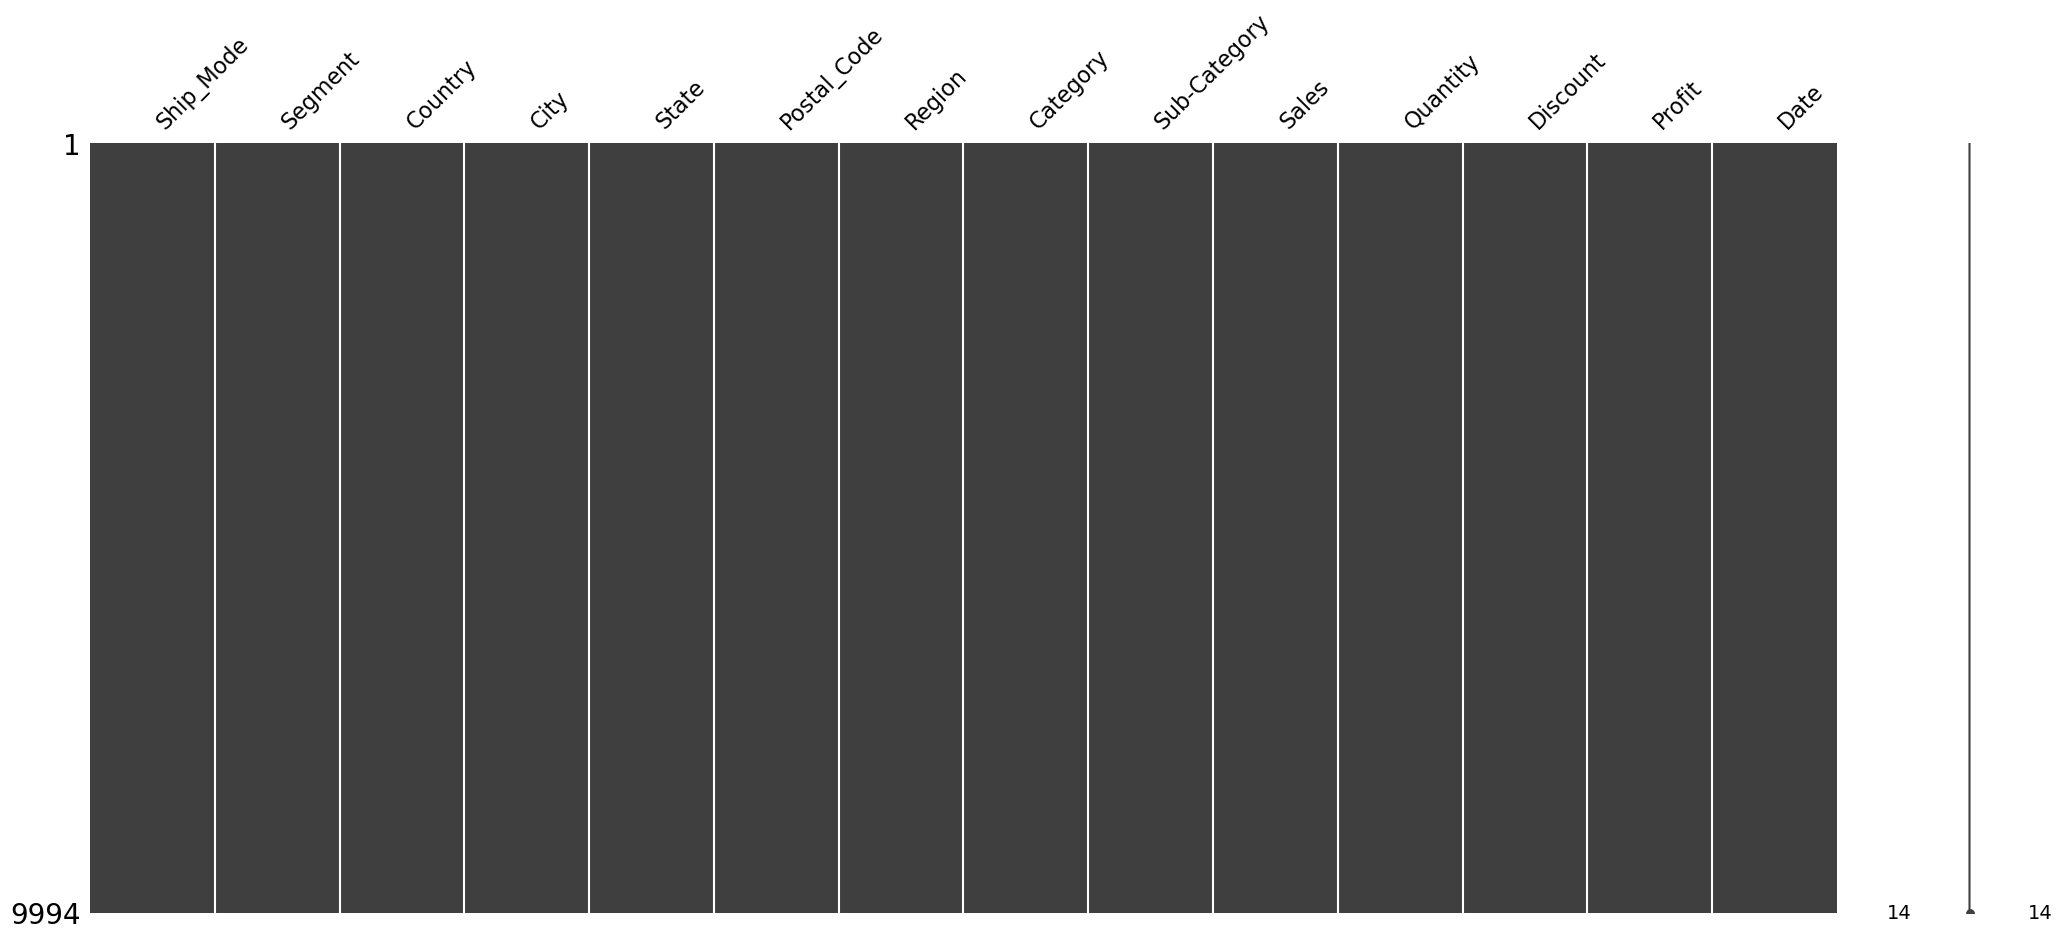

In [366]:
#It will check all null values or NaN/na values in dataframe using visualization
import missingno
missingno.matrix(df1)


In [367]:
#Phycically displays the locations of missing values in the DataFrame.
print(df1.isna())

      Ship_Mode  Segment  Country   City  State  Postal_Code  Region  \
0         False    False    False  False  False        False   False   
1         False    False    False  False  False        False   False   
2         False    False    False  False  False        False   False   
3         False    False    False  False  False        False   False   
4         False    False    False  False  False        False   False   
...         ...      ...      ...    ...    ...          ...     ...   
9989      False    False    False  False  False        False   False   
9990      False    False    False  False  False        False   False   
9991      False    False    False  False  False        False   False   
9992      False    False    False  False  False        False   False   
9993      False    False    False  False  False        False   False   

      Category  Sub-Category  Sales  Quantity  Discount  Profit   Date  
0        False         False  False     False     False   Fals

In [368]:
#gives you the total count of missing values per column.
df1.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Date            0
dtype: int64

# Finding Outliers

This is just for the understanding that if there are some null values in the dataset then to fill them with some values we need to first find the outliers to get the best outcome and to handle outliers(The less the outliers it will give yo best outcome). There are 3 methods to fill the missing values.

1)Mean Imputation :- This is used only when there are very less outliers in the column

2)Median Imputation :- This is used when there are many outliers in the column

3)Mode Imputation :- we can use this when there is less outliers(but not preferable). Primarily it is used to handle the missing valuse in Catagorical column

4)Or else if there are very few outliers and missing values we can also drop them 

In [369]:
 check_outliers=['Sales',
'Quantity','Discount','Profit']
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers


In [370]:
for column_name in check_outliers:
    column_data = df1[column_name]
    column_outliers = detect_outliers(column_data)
    outlier_count = len(column_outliers)
    print(f"Number of outliers in column '{column_name}': {outlier_count}")


Number of outliers in column 'Sales': 127
Number of outliers in column 'Quantity': 240
Number of outliers in column 'Discount': 540
Number of outliers in column 'Profit': 647


# --------------------------------------------------------------------

# Finding Profit and Loss

# For Profit

In [371]:
profit = df1[df1['Profit'] > 0]
profit

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136,2024-04-13
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820,2024-08-15
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714,2024-03-08
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164,2024-05-22
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694,2024-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028,2024-03-29
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332,2024-03-28
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932,2024-06-03
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200,2024-04-22


In [372]:
profit.shape

(8058, 14)

In [373]:
profit.describe()

,Postal_Code,Sales,Quantity,Discount,Profit,Date
count,8058.000000,8058.000000,8058.000000,8058.000000,8058.000000,8058
mean,55016.047779,223.480623,3.794738,0.081044,54.917884,2024-07-01 05:21:50.796723968
min,1040.000000,0.990000,1.000000,0.000000,0.062800,2024-01-01 00:00:00
25%,21843.250000,17.940000,2.000000,0.000000,5.324550,2024-03-29 00:00:00
50%,53711.000000,50.965000,3.000000,0.000000,13.317600,2024-07-01 00:00:00
75%,90045.000000,191.976000,5.000000,0.200000,40.465550,2024-10-02 00:00:00
max,99301.000000,17499.950000,14.000000,0.400000,8399.976000,2024-12-31 00:00:00
std,33295.003380,600.340641,2.244696,0.098884,213.713980,NaN


In [518]:
#overall total profit recorded
Total_profit=np.positive(profit['Profit'].sum())
print(Total_profit)

442528.3074


# For Loss

In [375]:
loss = df1[df1['Profit'] < 0]
loss

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2024-01-18
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,2024-05-19
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,2024-10-26
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,2024-01-20
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,2024-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,2024-10-28
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,2024-04-11
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,2024-09-21
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772,2024-01-25


In [376]:
loss.shape

(1871, 14)

In [377]:
# Here min profit means maximum Loss and max profit means minimum Loss
loss.describe()

,Postal_Code,Sales,Quantity,Discount,Profit,Date
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871
mean,55991.122929,250.511574,3.762694,0.480887,-83.448042,2024-06-29 20:16:48.230892544
min,1841.000000,0.444000,1.000000,0.100000,-6599.978000,2024-01-01 00:00:00
25%,33024.000000,12.503000,2.000000,0.200000,-58.660950,2024-04-02 00:00:00
50%,60623.000000,71.088000,3.000000,0.400000,-18.088200,2024-06-28 00:00:00
75%,77095.000000,284.922000,5.000000,0.700000,-6.261500,2024-09-30 00:00:00
max,98198.000000,22638.480000,14.000000,0.800000,-0.089500,2024-12-31 00:00:00
std,26041.501999,715.067296,2.141347,0.235080,284.423422,NaN


In [378]:
#overall total loss recorded
Total_loss=np.negative(loss['Profit'].sum())
print(round(Total_loss))

156131


# --------------------------------------------------------------------

# Frequency of order placed


# Finding total sales for every distinct element in every columns


# Finding total Profit for every distinct element in every columns


# Finding total Loss for every distinct element in every columns


# Finding total Quantity for every distinct element in every columns

# Finding total Discount for every distinct element in every columns

# #(Calculate basic descriptive statistics for key metrics such as total sales,average order value, etc.)


# SUB-CATEGORY

In [379]:
#Frequency of Order Placed
df1['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [380]:
#Total sales for each distinct element in the perticular column
SubCategory_sales = df1.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True)
print(SubCategory_sales)

Sub-Category
Fasteners        3024.2800
Labels          12486.3120
Envelopes       16476.4020
Art             27118.7920
Supplies        46673.5380
Paper           78479.2060
Furnishings     91705.1640
Appliances     107532.1610
Bookcases      114879.9963
Copiers        149528.0300
Accessories    167380.3180
Machines       189238.6310
Binders        203412.7330
Tables         206965.5320
Storage        223843.6080
Chairs         328449.1030
Phones         330007.0540
Name: Sales, dtype: float64


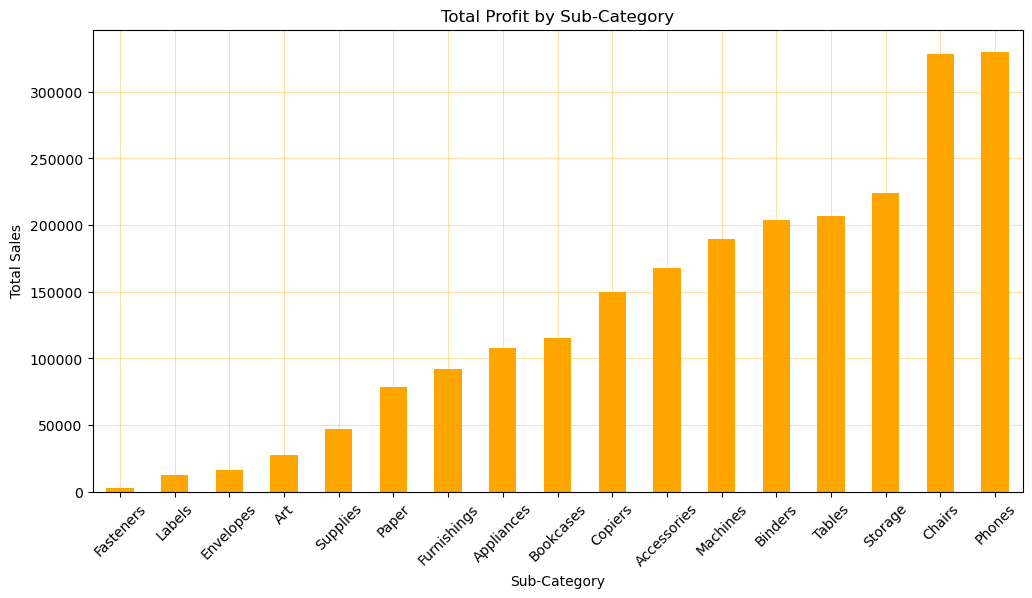

In [381]:
plt.figure(figsize=(12, 6))  
SubCategory_sales.plot(kind='bar', color='orange')
plt.grid(color = 'orange',linewidth = 0.5,axis = 'both',alpha = 0.5)
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45) 
plt.show()

In [382]:
SubCategory_profit = profit.groupby('Sub-Category')['Profit'].sum()
print(SubCategory_profit)

Sub-Category
Accessories    42867.2622
Appliances     26767.6466
Art             6527.7870
Binders        68732.2597
Bookcases       8679.6500
Chairs         36471.0076
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        982.7134
Furnishings    19550.0570
Labels          5546.2540
Machines       33503.4251
Paper          34053.5693
Phones         52046.3541
Storage        27705.1302
Supplies        1826.5224
Tables         14686.6672
Name: Profit, dtype: float64


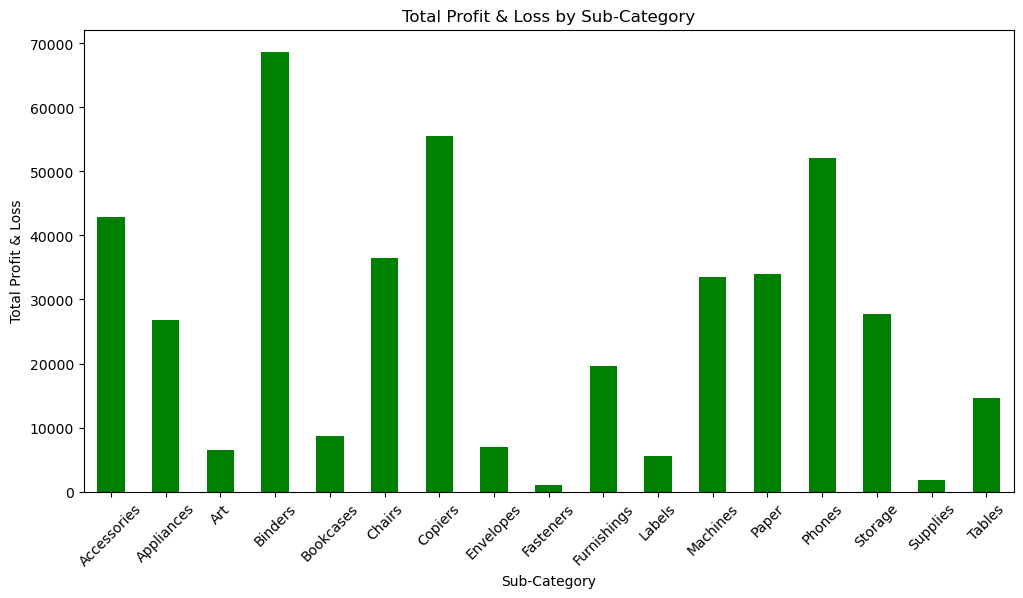

In [383]:
plt.figure(figsize=(12, 6))  
SubCategory_profit.plot(kind='bar', color='green')
plt.title('Total Profit & Loss by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit & Loss')
plt.xticks(rotation=45) 
plt.show()

In [384]:
SubCategory_loss = loss.groupby('Sub-Category')['Profit'].sum()
print(SubCategory_loss)

Sub-Category
Accessories     -930.6265
Appliances     -8629.6412
Binders       -38510.4964
Bookcases     -12152.2060
Chairs         -9880.8413
Fasteners        -33.1952
Furnishings    -6490.9134
Machines      -30118.6682
Phones         -7530.6235
Storage        -6426.3038
Supplies       -3015.6219
Tables        -32412.1483
Name: Profit, dtype: float64


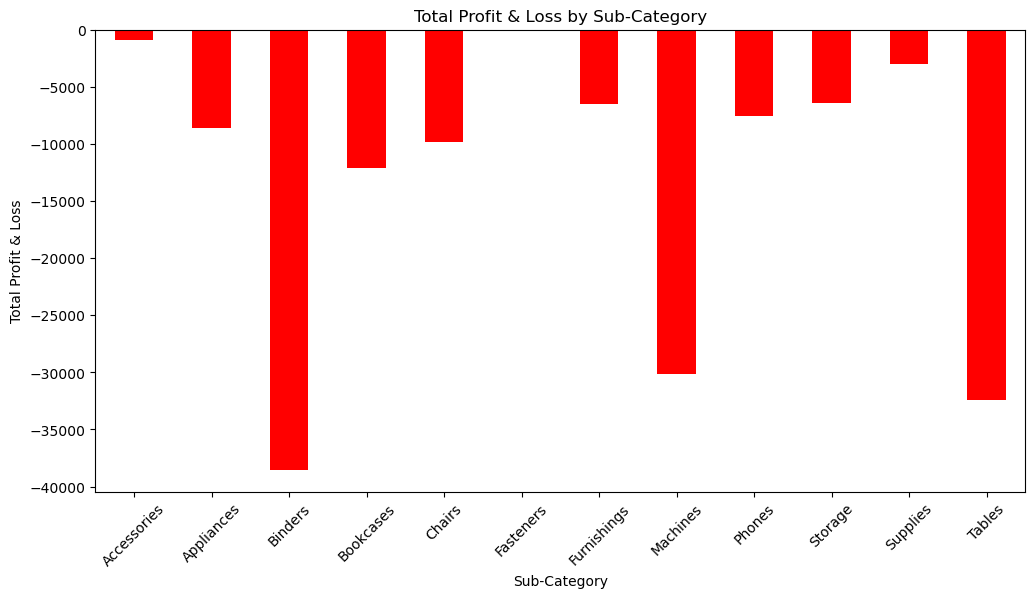

In [385]:
plt.figure(figsize=(12, 6))  
SubCategory_loss.plot(kind='bar', color='red')
plt.title('Total Profit & Loss by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit & Loss')
plt.xticks(rotation=45) 
plt.show()

In [386]:
SubCategory_quantity = df1.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=True)
print(SubCategory_quantity)

Sub-Category
Copiers         234
Machines        440
Supplies        647
Bookcases       868
Envelopes       906
Fasteners       914
Tables         1241
Labels         1400
Appliances     1729
Chairs         2356
Accessories    2976
Art            3000
Storage        3158
Phones         3289
Furnishings    3563
Paper          5178
Binders        5974
Name: Quantity, dtype: int64


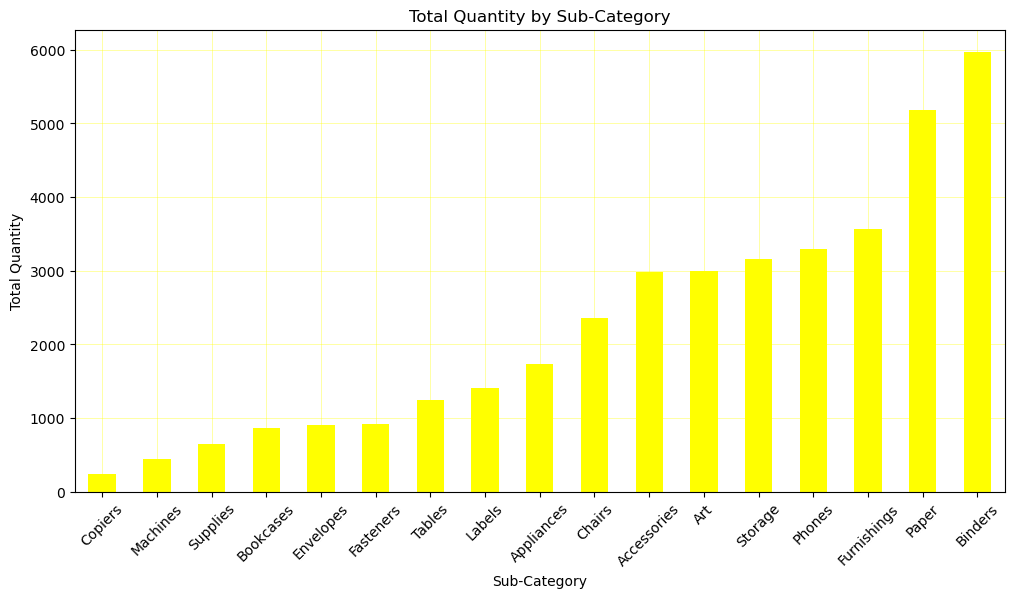

In [387]:
plt.figure(figsize=(12, 6))  
SubCategory_quantity.plot(kind='bar', color='yellow')
plt.grid(color = 'yellow',linewidth = 0.5,axis = 'both',alpha = 0.5)
plt.title('Total Quantity by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45) 
plt.show()

In [388]:
SubCategory_discount = profit.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=True)
print(SubCategory_discount)

Sub-Category
Supplies         8.00
Tables           8.60
Machines         9.60
Bookcases        9.65
Copiers         11.00
Fasteners       15.40
Envelopes       20.40
Appliances      24.00
Labels          25.00
Storage         30.80
Chairs          38.60
Furnishings     42.00
Accessories     42.40
Art             59.60
Phones          90.80
Paper          102.60
Binders        114.60
Name: Discount, dtype: float64


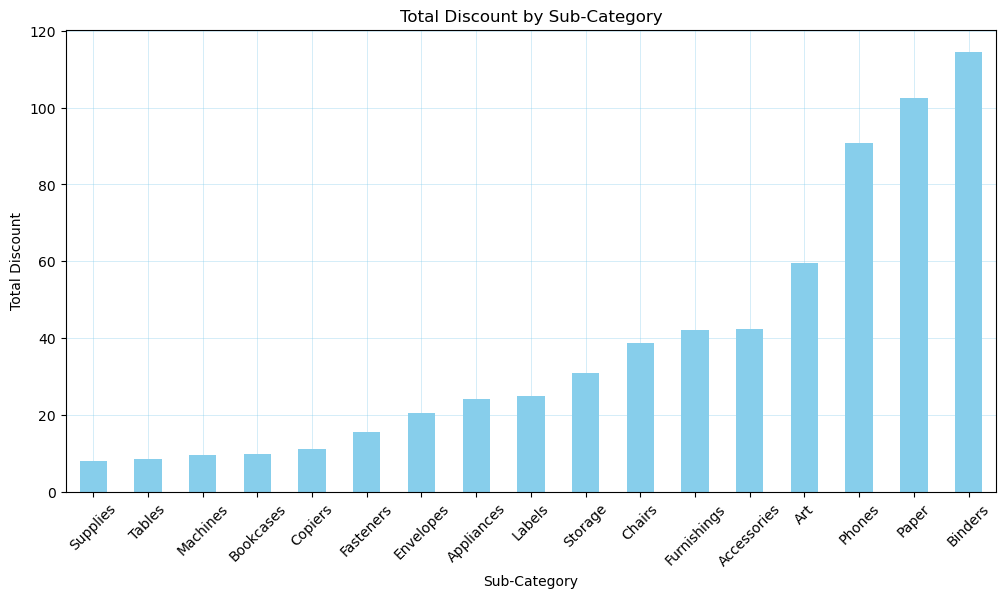

In [389]:
plt.figure(figsize=(12, 6))  
SubCategory_discount.plot(kind='bar', color='skyblue')
plt.grid(color = 'skyblue',linewidth = 0.5,axis = 'both',alpha = 0.5)
plt.title('Total Discount by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Discount')
plt.xticks(rotation=45) 
plt.show()

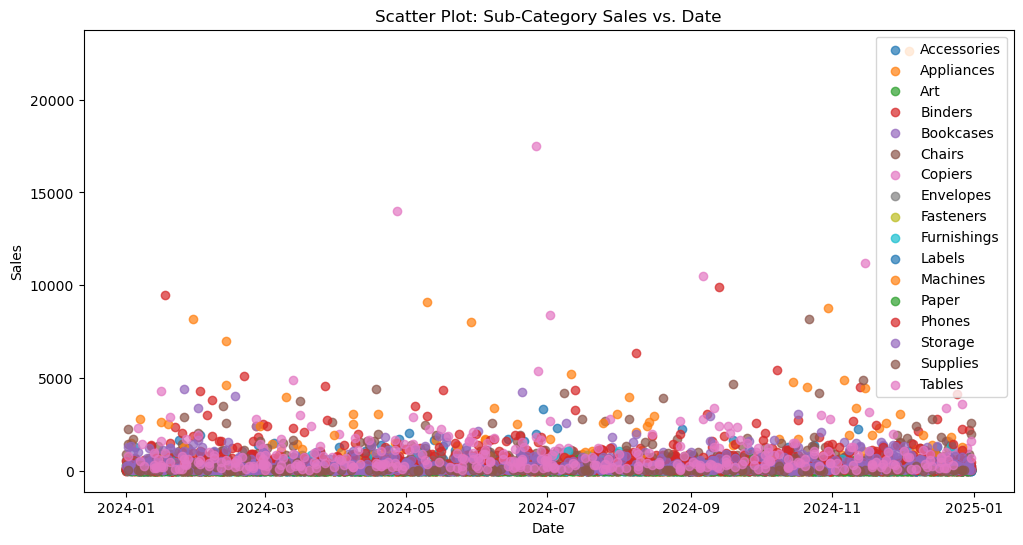

In [395]:
plt.figure(figsize=(12, 6))
for sub_category, data in df1.groupby("Sub-Category"):
    plt.scatter(data["Date"], data["Sales"], label=sub_category, alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Scatter Plot: Sub-Category Sales vs. Date")
plt.legend()
plt.show()



# Lowest and Highest selling Sub-Category

In [443]:
# Top Selling Sub-Category
best_selling_SubCategory = SubCategory_sales.idxmax()
print(f"The best-selling category is: {best_selling_SubCategory}")

# Lowest Selling Sub-Category
Lowest_selling_SubCategory = SubCategory_sales.idxmin()
print(f"The best-selling category is: {Lowest_selling_SubCategory}")

The best-selling category is: Phones
The best-selling category is: Fasteners


# CATEGORY

In [396]:
#Frequency of Order Placed
df1['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

(array([2121.,    0.,    0.,    0.,    0., 6026.,    0.,    0.,    0.,
        1847.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

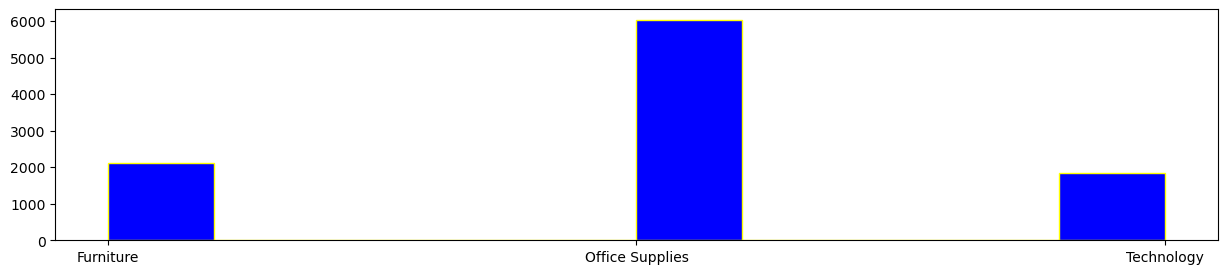

In [397]:
plt.hist(df1['Category'], color = "Blue" , ec = "yellow")

# Category-wise Performance

Analyze sales trends for different categories (Furniture, Office Supplies, Technology).

In [398]:
Category_sales = df1.groupby('Category')['Sales'].sum().sort_values(ascending=True)
print(Category_sales)

Category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: Sales, dtype: float64


Analyze Profit trends for different categories (Furniture, Office Supplies, Technology).

In [399]:
Category_profit = profit.groupby('Category')['Profit'].sum().sort_values(ascending=True)
print(Category_profit)

Category
Furniture           79387.3818
Office Supplies    179106.0593
Technology         184034.8663
Name: Profit, dtype: float64


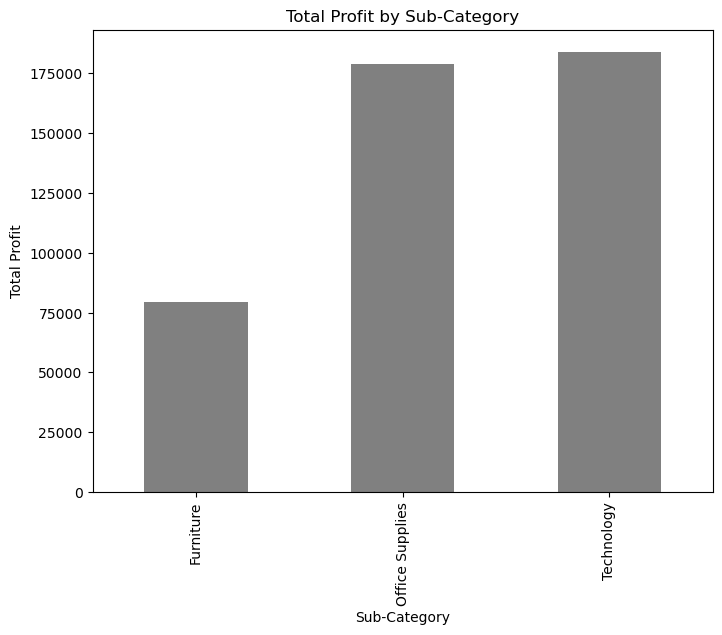

In [480]:
plt.figure(figsize=(8, 6))  
Category_profit.plot(kind='bar', color='grey')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

In [400]:
Category_loss = loss.groupby('Category')['Profit'].sum().sort_values(ascending=True)
print(Category_loss)

Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64


In [445]:
Category_quantity = df1.groupby('Category')['Quantity'].sum().sort_values(ascending=True)
print(Category_quantity)

Category
Technology          6939
Furniture           8028
Office Supplies    22906
Name: Quantity, dtype: int64


In [402]:
Category_discount = profit.groupby('Category')['Discount'].sum().sort_values(ascending=True)
print(Category_discount)

Category
Furniture           98.85
Technology         153.80
Office Supplies    400.40
Name: Discount, dtype: float64


# REGION

In [403]:
Region_sales = df1.groupby('Region')['Sales'].sum().sort_values(ascending=True)
print(Region_sales)

Region
South      391721.9050
Central    501239.8908
East       678781.2400
West       725457.8245
Name: Sales, dtype: float64


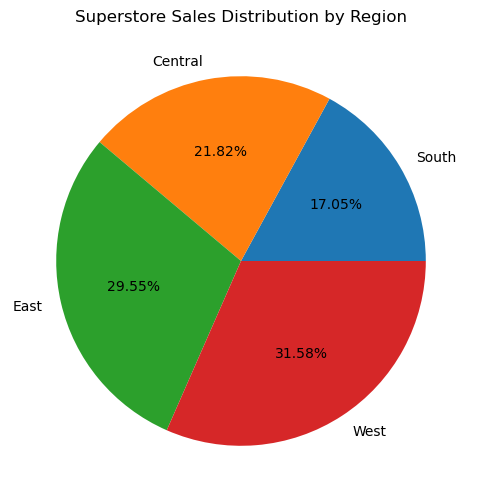

In [479]:
# Plot region-wise sales or profit
plt.figure(figsize=(8, 6))
plt.pie(Region_sales, labels=Region_sales.index, autopct='%1.2f%%')
plt.title('Superstore Sales Distribution by Region')
plt.show()

In [404]:
#Frequency of Order Placed
df1['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

(array([1620.,    0.,    0., 3203.,    0.,    0., 2323.,    0.,    0.,
        2848.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

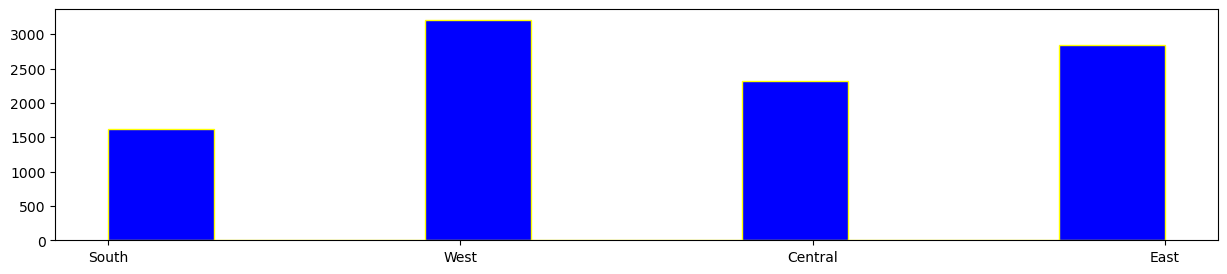

In [405]:
#Histogram(To find out range of the Region)
plt.hist(df1['Region'], color = "Blue" , ec = "yellow")

In [406]:
Region_profit = profit.groupby('Region')['Profit'].sum().sort_values(ascending=True)
print(Region_profit)

Region
South       74254.2626
Central     96021.2475
West       131139.4098
East       141113.3875
Name: Profit, dtype: float64


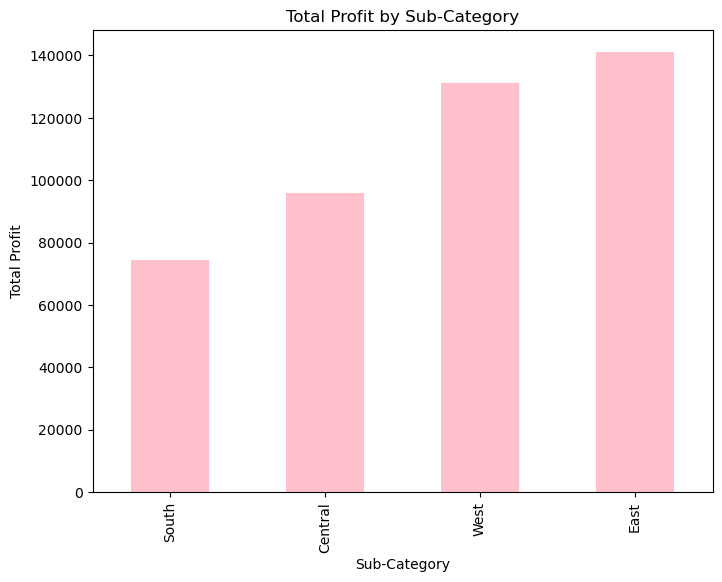

In [483]:
plt.figure(figsize=(8, 6))  
Region_profit.plot(kind='bar', color='Pink')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

In [407]:
Region_loss = loss.groupby('Region')['Profit'].sum().sort_values(ascending=True)
print(Region_loss)

Region
Central   -56314.8850
East      -49590.6075
South     -27504.8323
West      -22720.9609
Name: Profit, dtype: float64


In [449]:
Region_quantity = df1.groupby('Region')['Quantity'].sum().sort_values(ascending=True)
print(Region_quantity)

Region
South       6209
Central     8780
East       10618
West       12266
Name: Quantity, dtype: int64


In [450]:
Region_discount = profit.groupby('Region')['Discount'].sum().sort_values(ascending=True)
print(Region_discount)

Region
South      109.80
Central    148.90
East       164.50
West       229.85
Name: Discount, dtype: float64


# Find the most & Least profitable region and city and State

In [484]:
City_profit = profit.groupby('City')['Profit'].sum().sort_values(ascending=True)
print(City_profit)

City
Jupiter                  0.1548
Bethlehem                0.7110
San Luis Obispo          1.1946
Arlington Heights        1.2348
Cuyahoga Falls           1.2528
                        ...    
Detroit              13181.7908
San Francisco        18849.1535
Seattle              29541.2676
Los Angeles          31611.0879
New York City        66003.0063
Name: Profit, Length: 513, dtype: float64


In [489]:
# Find the most profitable region
most_profitable_region = Region_profit.idxmax()
print(f"The most profitable region is: {most_profitable_region}")

# Find the Least profitable region
Least_profitable_region = Region_profit.idxmin()
print(f"The Least profitable region is: {Least_profitable_region}")

# Find the most profitable city
most_profitable_city = City_profit.idxmax()
print(f"The most profitable city is: {most_profitable_city}")

# Find the Least profitable city
Least_profitable_city = City_profit.idxmin()
print(f"The Least profitable city is: {Least_profitable_city}")

The most profitable region is: East
The Least profitable region is: South
The most profitable city is: New York City
The Least profitable city is: Jupiter


# SHIP MODE

As we can see in ship mode customers are preffering Standard Class more then any other and using same day shipping very 
less for this we should br giving some offers like genrally smae day shipping is available for prime or vip costomers so 
either we can add some more features in prime members of we can add mor perks and discounts to it like 
For Example if you are prime member and yo buy min of this amount and will get some additional discount and some coupons and 
also same day shipping

In [458]:
#Frequency of Order 
Ship_Mode_Count = df1['Ship_Mode'].value_counts()
Ship_Mode_Count

Ship_Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

(array([1945.,    0.,    0., 5968.,    0.,    0., 1538.,    0.,    0.,
         543.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

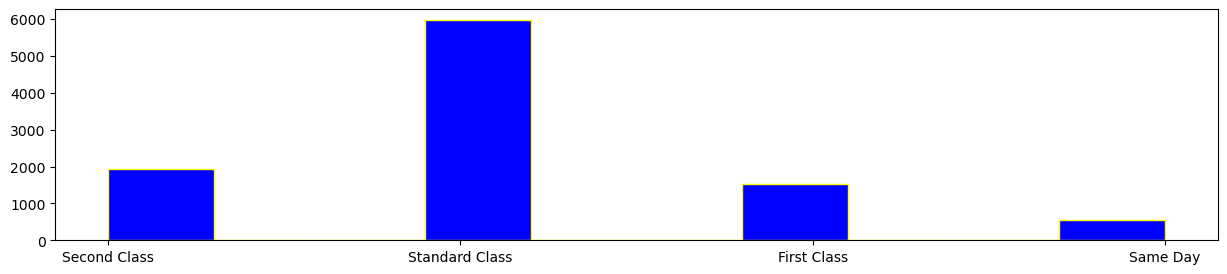

In [411]:
#Histogram(To find out range of the Region)
plt.hist(df1['Ship_Mode'], color = "Blue" , ec = "yellow")

In [415]:
Ship_Mode_quantity = df1.groupby('Ship_Mode')['Quantity'].sum().sort_values(ascending=True)
print(Ship_Mode_quantity)

Ship_Mode
Same Day           1960
First Class        5693
Second Class       7423
Standard Class    22797
Name: Quantity, dtype: int64


In [416]:
Ship_Mode_discount = df1.groupby('Ship_Mode')['Discount'].sum().sort_values(ascending=True)
print(Ship_Mode_discount)

Ship_Mode
Same Day           82.75
First Class       253.17
Second Class      270.15
Standard Class    955.02
Name: Discount, dtype: float64


# Find the most preferred/common ship mode

In [459]:
# Find the most common ship mode
preferred_ship_mode = Ship_Mode_Count.idxmax()
print(f"The preferred ship mode is: {preferred_ship_mode}")

The preferred ship mode is: Standard Class


# SEGMENT

# Segment customers based on their purchasing behavior (e.g., high-value customers, frequent customers)

By Analizing Total sales for each segment , and frequency of the order placed with the total quantity we hereby can say that segment "consumer" are the frequent customers and also it has the highest sales therefore they are also a high-value customers
By this we can see that Home Office has the lowest sales and lowest order placed therefore we have to work on this segment by improving sales by giving some perks or discount to it. Or we can manupulate the price by incresing the selling cost and also giving the discount.

In [417]:
Segment_sales = df1.groupby('Segment')['Sales'].sum().sort_values(ascending=True)
print(Segment_sales)

Segment
Home Office    4.296531e+05
Corporate      7.061464e+05
Consumer       1.161401e+06
Name: Sales, dtype: float64


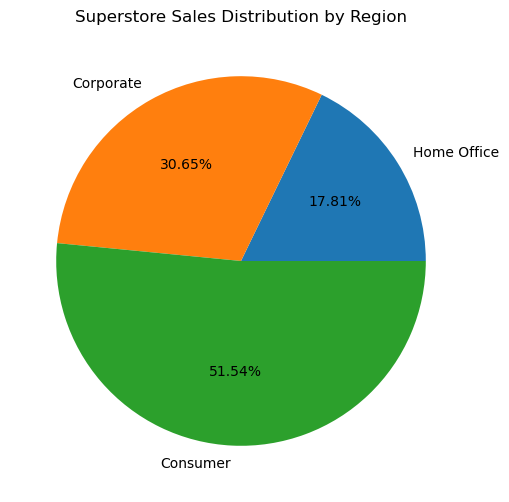

In [491]:
# Plot Segment-wise sales or profit
plt.figure(figsize=(8, 6))
plt.pie(Segment_sales, labels=Segment_sales.index, autopct='%1.2f%%')
plt.title('Superstore Sales Distribution by Region')
plt.show()

In [418]:
df1['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

(array([5191.,    0.,    0.,    0.,    0., 3020.,    0.,    0.,    0.,
        1783.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

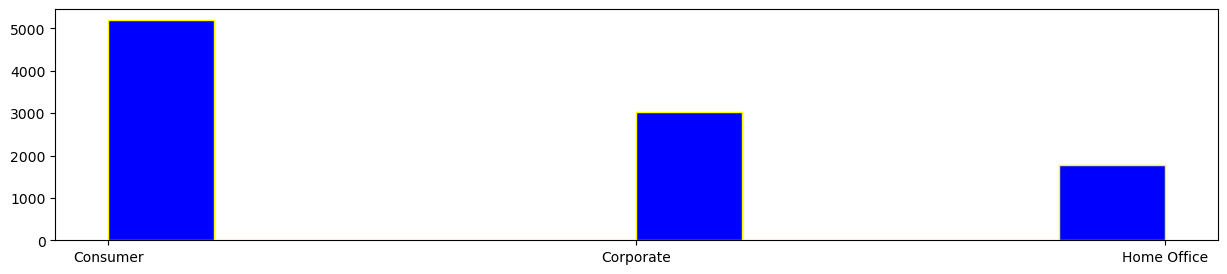

In [419]:
plt.hist(df1['Segment'], color = "Blue" , ec = "yellow")

In [420]:
Segment_sales = df1.groupby('Segment')['Quantity'].sum().sort_values(ascending=True)
print(Segment_sales)

Segment
Home Office     6744
Corporate      11608
Consumer       19521
Name: Quantity, dtype: int64


In [421]:
Segment_profit = profit.groupby('Segment')['Profit'].sum().sort_values(ascending=True)
print(Segment_profit)

Segment
Home Office     86697.0454
Corporate      136766.3416
Consumer       219064.9204
Name: Profit, dtype: float64


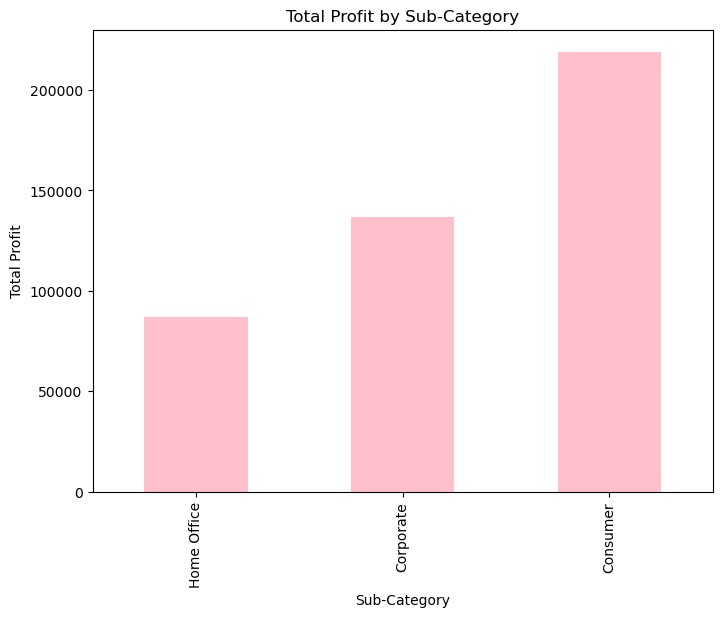

In [492]:
plt.figure(figsize=(8, 6))  
Segment_profit.plot(kind='bar', color='Pink')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.show()

In [422]:
Segment_loss = loss.groupby('Segment')['Profit'].sum().sort_values(ascending=True)
print(Segment_loss)

Segment
Consumer      -84945.7112
Corporate     -44787.2076
Home Office   -26398.3669
Name: Profit, dtype: float64


In [423]:
Segment_discount = df1.groupby('Segment')['Discount'].sum().sort_values(ascending=True)
print(Segment_discount)

Segment
Home Office    262.33
Corporate      477.85
Consumer       820.91
Name: Discount, dtype: float64


# Find the most & Least profitable segment

In [455]:
# Find the most profitable segment
most_profitable_segment = Segment_profit.idxmax()
print(f"The most profitable customer segment is: {most_profitable_segment}")

least_profitable_segment = Segment_profit.idxmin()
print(f"The most profitable customer segment is: {least_profitable_segment}")

The most profitable customer segment is: Consumer
The most profitable customer segment is: Home Office


# STATE

By State count we understand that how many orders are getting placed in which state and to gain the profit acording to me we 
should stop the delivery to that states as we are unecessorly burning our resources for very small quantity as we are burning 
more than we are getting profitable from those state.

In [424]:
df1['State'].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [425]:
State_sales = df1.groupby('State')['Sales'].sum().sort_values(ascending=True)
print(State_sales)

State
North Dakota               919.9100
West Virginia             1209.8240
Maine                     1270.5300
South Dakota              1315.5600
Wyoming                   1603.1360
District of Columbia      2865.0200
Kansas                    2914.3100
Idaho                     4382.4860
Iowa                      4579.7600
New Mexico                4783.5220
Montana                   5589.3520
New Hampshire             7292.5240
Nebraska                  7464.9300
South Carolina            8481.7100
Vermont                   8929.3700
Louisiana                 9217.0300
Mississippi              10771.3400
Utah                     11220.0560
Arkansas                 11678.1300
Connecticut              13384.3570
Nevada                   16729.1020
Oregon                   17431.1500
Alabama                  19510.6400
Oklahoma                 19683.3900
Missouri                 22205.1500
Rhode Island             22627.9560
Maryland                 23705.5230
Delaware              

In [504]:
State_profit = profit.groupby('State')['Profit'].sum().sort_values(ascending=True)
print(State_profit)

State
Wyoming                   100.1960
North Dakota              230.1497
West Virginia             262.8752
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1162.8104
Iowa                     1183.8119
Oregon                   1700.0059
South Carolina           1769.0566
New Hampshire            1811.8192
Montana                  1833.3285
Tennessee                1915.3238
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Colorado                 2373.0469
Utah                     2546.5335
Mississippi              3172.9762
Arizona                  3228.8429
Nevada                   3426.3481
Connecticut              3531.1064
Arkansas                 4008.6871
North Carolina           4067.0732
Ohio                     4778.6236
Oklahoma                 4853.9560
Florida       

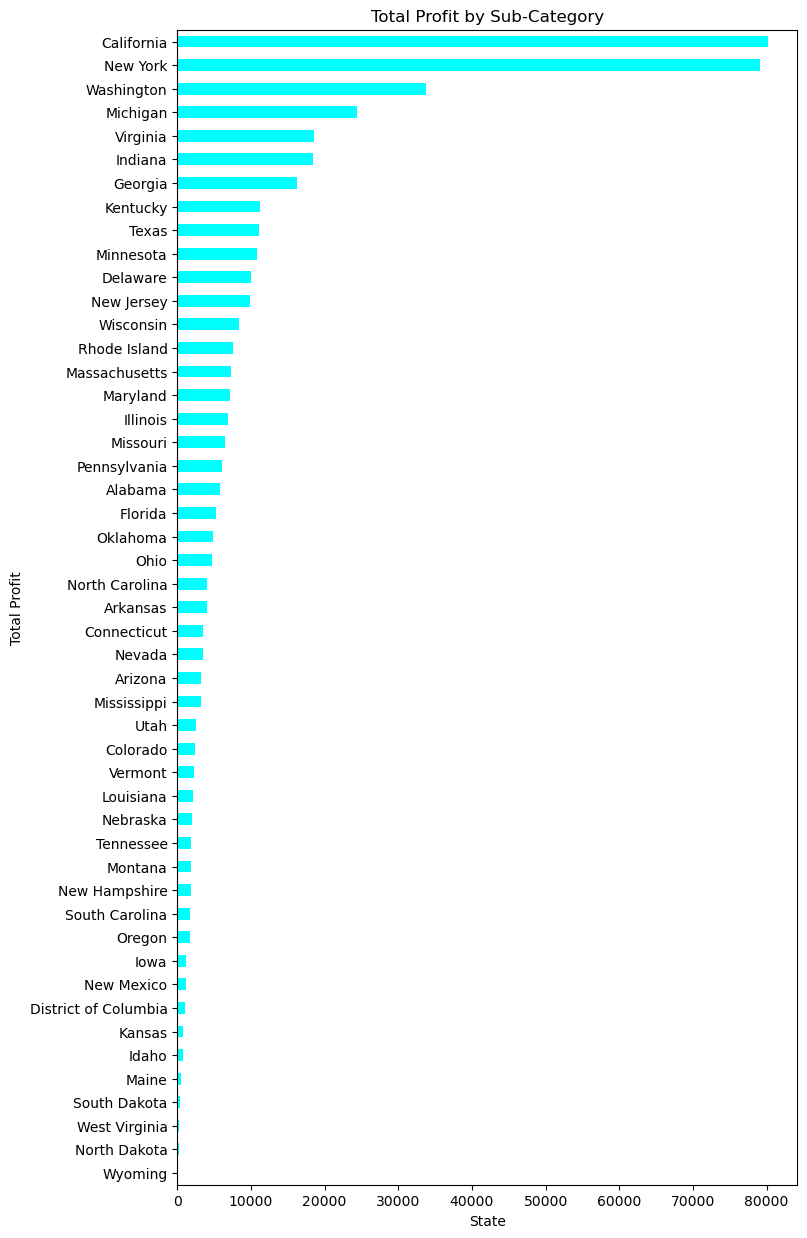

In [505]:
plt.figure(figsize=(8, 15))  
State_profit.plot(kind='barh', color='cyan')
plt.title('Total Profit by Sub-Category')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.show()

In [427]:
State_loss = loss.groupby('State')['Profit'].sum().sort_values(ascending=True)
print(State_loss)

State
Texas            -36813.1875
Ohio             -21750.0002
Pennsylvania     -21602.8515
Illinois         -19501.6975
North Carolina   -11557.9854
Colorado          -8900.9048
Florida           -8689.8295
Tennessee         -7257.0174
Arizona           -6656.7675
New York          -5031.1378
California        -3769.6651
Oregon            -2890.4764
Massachusetts      -566.2617
Washington         -387.8706
Rhode Island       -230.1678
Nevada             -109.5822
New Hampshire      -105.3164
Delaware            -85.8963
West Virginia       -76.9536
Maryland            -71.1170
New Jersey          -51.2906
Connecticut         -19.6146
New Mexico           -5.6943
Name: Profit, dtype: float64


In [428]:
States_Quantity = df1.groupby('State')['Quantity'].sum().sort_values(ascending=True)
print(States_Quantity)

State
Wyoming                    4
West Virginia             18
North Dakota              30
Maine                     35
District of Columbia      40
South Dakota              42
Vermont                   50
Montana                   56
Idaho                     64
Kansas                    74
Iowa                     112
New Hampshire            127
Nebraska                 136
New Mexico               151
Louisiana                156
Nevada                   168
South Carolina           172
Rhode Island             199
Utah                     219
Mississippi              221
Arkansas                 240
Oklahoma                 247
Missouri                 252
Alabama                  256
Connecticut              281
Minnesota                331
Delaware                 367
Maryland                 420
New Jersey               454
Wisconsin                463
Massachusetts            491
Oregon                   499
Kentucky                 523
Indiana                  578
Tennesse

In [429]:
State_discount = df1.groupby('State')['Discount'].sum().sort_values(ascending=True)
print(State_discount)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

In [490]:
# Find the most profitable State
most_profitable_State = State_profit.idxmax()
print(f"The most profitable State is: {most_profitable_State}")

# Find the Least profitable State
Least_profitable_State = State_profit.idxmin()
print(f"The Least profitable State is: {Least_profitable_State}")

The most profitable State is: California
The Least profitable State is: Wyoming


# Bivariate Analysis

Scatter plots of features(x axis) with target variable(y axis) were plotted out to understand the
relationship between the features and target variable                         Here we have two types of Bivariate data                                       

1)Numerical and Categorical –> When one variable is numerical and one is categorical 

2)Numerical and Numerical –> In this type both the variables of bivariate data, independent and dependent are having numerical values                                                                                   


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


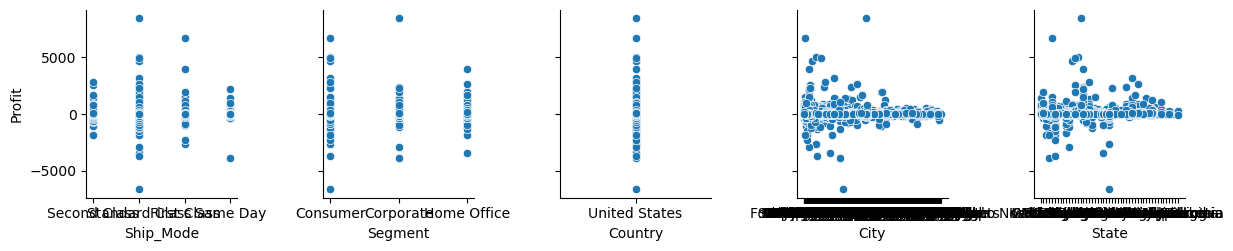

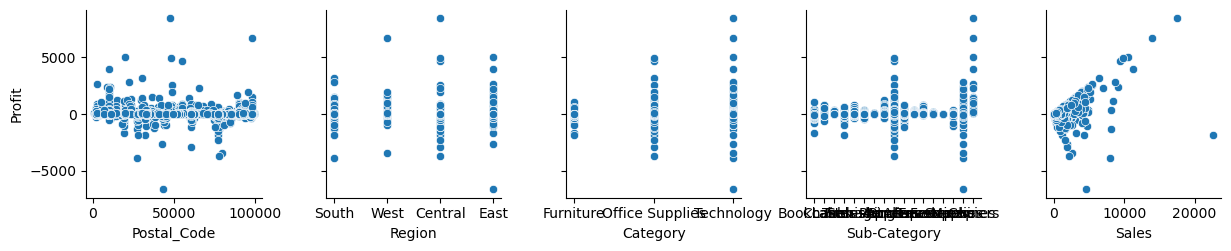

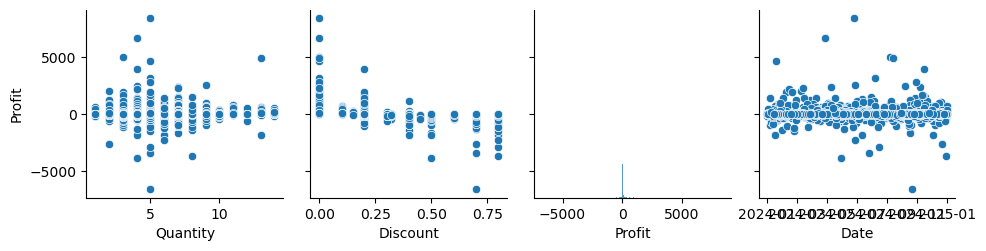

In [430]:
for i in range(0, len(df1.columns), 5):
    sns.pairplot(data=df1,
        x_vars=df1.columns[i:i+5],
        y_vars=['Profit'])


# Correlation Matrix
Here we can see a Moderate Relationship between Sales and Profit

1)Sales and Profit are Most Positively Correlated

2)Discount and Profit are Negatively Correlated

<Figure size 1000x800 with 0 Axes>

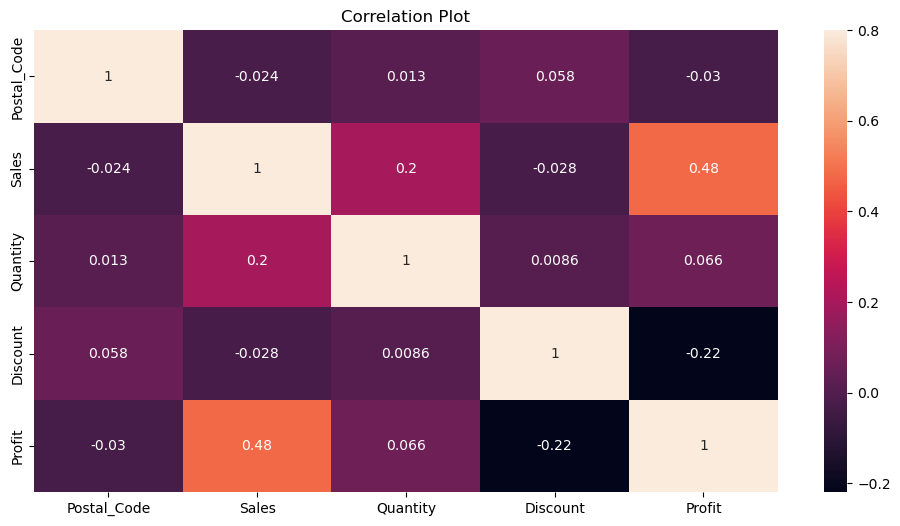

In [431]:
df1_numeric = df1.select_dtypes(include=['number'])
correlation_matrix = df1_numeric.corr()

# Assuming 'df1' is your DataFrame containing the variables for which you want to create the correlation plot
# You can replace 'df1' with your actual DataFrame and select the specific columns you want to include in the correlation plot
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(correlation_matrix, vmax=.8, annot=True)
plt.title('Correlation Plot')
plt.show()


# Histogram(To find out range of the element)

(array([3301., 2409., 1191., 1802.,  606.,  257.,  315.,   34.,   23.,
          56.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

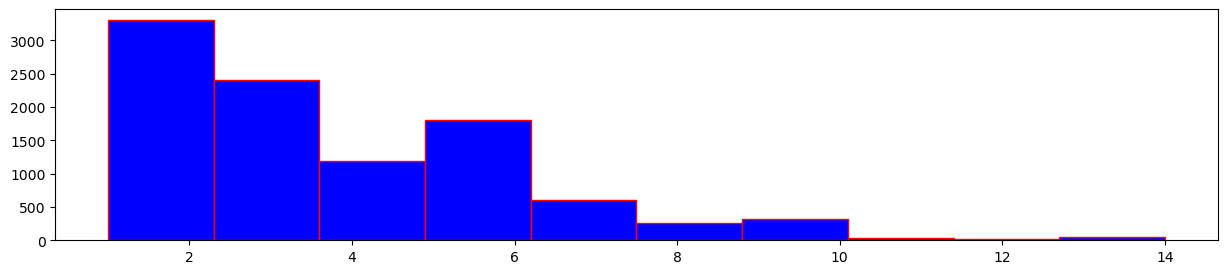

In [432]:
plt.hist(df1['Quantity'], color = "Blue" , ec = "red")

In [433]:
#Here we can see that loose quantity have the higest orders
#(By this we can predict that this superstore is not a wholesale shop it 
#is a retail store and there is no minimum order quantity)
df1['Quantity'].value_counts()

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

In [435]:
# Here we can see some of the address have order many times by this we can 
#say that they are our regular customers and some address are having only 
#one order eitheer we can take risk of loosing them by not giving them d
#iscount or perks else giving more perks to the regular customers as they 
#will stay for very long or else we can give more discount to the less 
#frequent customers to make them order more
df1['Postal_Code'].value_counts()

Postal_Code
10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
27534      1
53186      1
32503      1
94509      1
63376      1
Name: count, Length: 631, dtype: int64

# Time Series Analysis

# calculate total sales and Profit(including loss) on each date

#Daily Date wise Sales
Date
2024-01-01     3877.546
2024-01-02     9189.614
2024-01-03     3953.519
2024-01-04     6378.496
2024-01-05     5570.438
                ...    
2024-12-27    13826.708
2024-12-28     4095.300
2024-12-29     4895.344
2024-12-30     5817.149
2024-12-31     8691.668
Name: Sales, Length: 366, dtype: float64


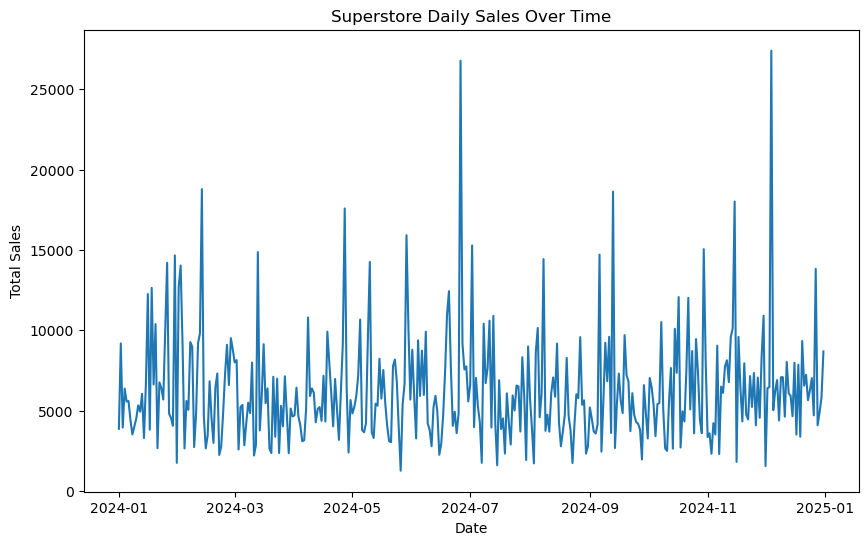

In [525]:
# calculate total sales on each date
daily_sales = df1.groupby('Date')['Sales'].sum()
print("#Daily Date wise Sales")
print(daily_sales)

# Plot daily sales over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Superstore Daily Sales Over Time')
plt.show()

In [520]:
daily_Profit = df1.groupby('Date')['Profit'].sum()
daily_Profit

Date
2024-01-01      80.4628
2024-01-02    2148.0234
2024-01-03     921.2590
2024-01-04    1064.8168
2024-01-05     573.9962
                ...    
2024-12-27    1139.7477
2024-12-28     815.8646
2024-12-29     904.8902
2024-12-30   -3423.7001
2024-12-31    1748.0638
Name: Profit, Length: 366, dtype: float64

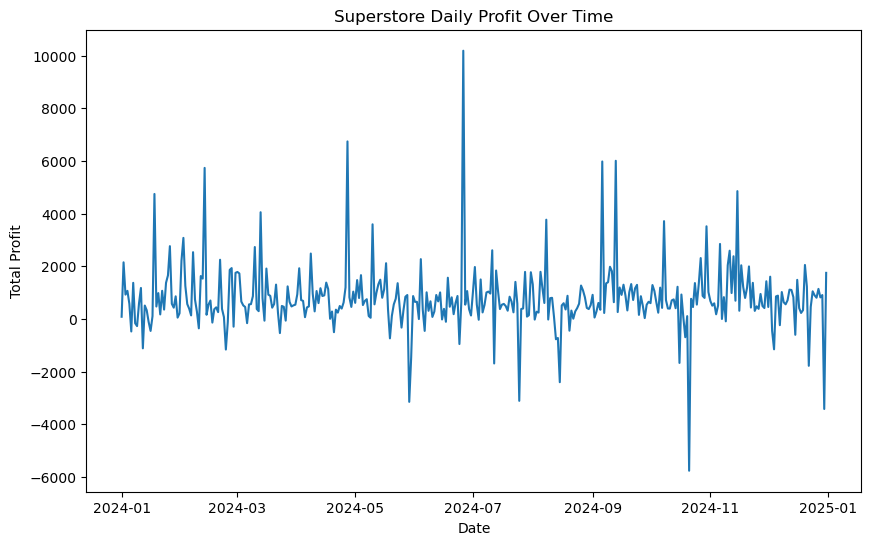

In [521]:
# Plot daily profit over time
plt.figure(figsize=(10, 6))
plt.plot(daily_Profit.index, daily_Profit.values)
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.title('Superstore Daily Profit Over Time')
plt.show()

In [538]:
# Find the most profitable day
most_profitable_day = daily_Profit.idxmax()
print(f"The most profitable customer segment is: {most_profitable_day}")

The most profitable customer segment is: 2024-06-26 00:00:00


In [539]:
# Find the Least profitable day
Least_profitable_month = daily_Profit.idxmin()
print(f"The Least profitable customer segment is: {Least_profitable_month}")

The Least profitable customer segment is: 2024-10-21 00:00:00


# This is Monthly calculated total Sales and calculated Total Profit(after all loss included)

In [513]:
monthly_sales = df1.groupby(df1['Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales

Date
2024-01    198670.5930
2024-02    202825.1156
2024-03    163701.6668
2024-04    181611.5481
2024-05    196027.9040
2024-06    207500.0006
2024-07    184054.3734
2024-08    171255.2579
2024-09    181690.7560
2024-10    199660.4423
2024-11    195434.3444
2024-12    214768.8582
Freq: M, Name: Sales, dtype: float64

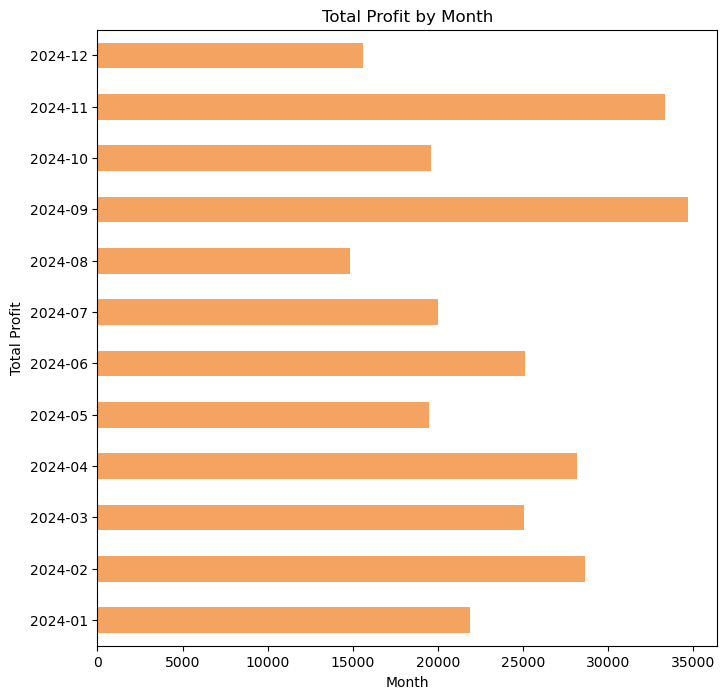

In [533]:
plt.figure(figsize=(8, 8))  
monthly_sales.plot(kind='barh', color='sandybrown')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()

In [532]:
monthly_profit = df1.groupby(df1['Date'].dt.to_period('M'))['Profit'].sum()
monthly_profit

Date
2024-01    21912.7939
2024-02    28664.8438
2024-03    25075.1504
2024-04    28153.5187
2024-05    19481.6987
2024-06    25088.7108
2024-07    20016.3343
2024-08    14813.3670
2024-09    34680.2808
2024-10    19598.4436
2024-11    33315.8389
2024-12    15596.0408
Freq: M, Name: Profit, dtype: float64

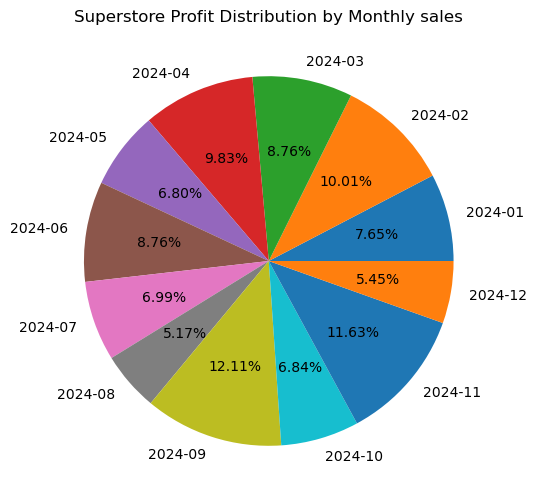

In [534]:
# Plot Segment-wise sales or profit
plt.figure(figsize=(8, 6))
plt.pie(monthly_profit, labels=monthly_profit.index, autopct='%1.2f%%')
plt.title('Superstore Profit Distribution by Monthly sales')
plt.show()

In [536]:
# Find the most profitable Month
most_profitable_month = monthly_profit.idxmax()
print(f"The most profitable customer segment is: {most_profitable_month}")

The most profitable customer segment is: 2024-09


In [537]:
# Find the Least profitable Month
least_profitable_month = monthly_profit.idxmin()
print(f"The Least profitable month is: {least_profitable_month}")

The Least profitable month is: 2024-08


# This is Yearly calculated total Sales and calculated Total Profit(after all loss included)

In [514]:
yearly_sales = df1.groupby(df1['Date'].dt.to_period('Y'))['Sales'].sum()
yearly_sales

Date
2024    2.297201e+06
Freq: A-DEC, Name: Sales, dtype: float64

In [535]:
yearly_profit = df1.groupby(df1['Date'].dt.to_period('Y'))['Profit'].sum()
yearly_profit

Date
2024    286397.0217
Freq: A-DEC, Name: Profit, dtype: float64

# Conclusion

1)Main reason which leads to loss is Discount.

2)Some areas experiences more loss due to more discounts and some areas leads to less sales due to less discounts. 

3)we should give more discounts during festival seasons. 

4)Home office segment needs better improvement.

5)Some cities have very less sales. It may be due to lack of awareness. So advertising in those cities will leads to sales or sales should we stop in that perticular cities
